In SVR, we need to apply Feature Scaling because we donot have those coefficients that we had in linear regression models learnt in the previous chapters.

Conclusion:
    1. We dont apply feature scaling to dummy varibles resulting from the OneHotEncoding.
    2. We dont apply feature scaling when the dependent variable takes binary form like 1 or 0 or Yes or No.
    3. When the values take super high or super low values, its a must to apply feature scaling.
    4. Apply feature scaling ONLY after the split.
    5. IMPORTANT: When doing feature scaling, ensure that all the values are in a 2D Array, as the FeatureScaling expects a 2D Array. [i.e ensure that the dependent variable is also in a 2D Array].
    6. Ensure that you use different FeatureScaling objects for dependent and independent variables.

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
dataset = pd.read_csv("Chapter_5_Position_Salaries_Data.csv")
X = dataset.iloc[:, 1:-1].values 
Y = dataset.iloc[:,-1].values
print(X,Y)
#iloc-> locate indexes
# We use .values to convert it into numpy array.

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [3]:
Y = Y.reshape(len(Y), 1)

# Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()

X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

print(X,Y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training the SVR model on the Training Set

In [5]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,Y)

c:\users\eduom\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Predicting a new result

In [6]:
y_pred=regressor.predict(sc_X.transform([[6.5]]))

In [14]:
sc_Y.inverse_transform(y_pred)

array([170370.0204065])

# Visualising the SVR Results


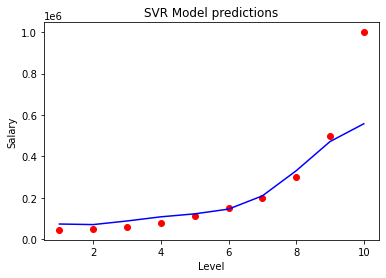

In [20]:
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = "red")
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X)), color="blue")
plt.title("SVR Model predictions")
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

# Visualising the SVR Results (for higher resolution and smoother curve)

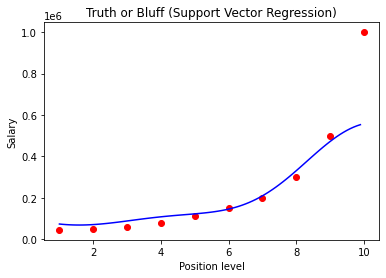

In [22]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = 'red')
plt.plot(X_grid, sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()